# King, William Joshua 
# ME 555 Homework 1

## Setup

In [ ]:
# We need to import key libraries that we're going to use.  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# to make this notebook's output stable across runs, we are going to see the random seed
np.random.seed(42)

## Data For Specific Problems

**Problem 3(a)**: 1-d test scores for pass/fail

In [ ]:
# Here is a function that generates data of students taking a test.  It's just like the real thing!
def generate_students_pass_fail(n=300,pass_line=75,random_seed=42):
    def sigmoid(x):
        return 1./(1.+np.exp(-x))
    # Generates noisy data along curved line.
    # The curve is non-linear and the noise/variance is heteroskedastic and non-gaussian, so it breaks
    # pretty much all classical statistical model assumptions.  
    np.random.seed(random_seed)
    x = 6*np.random.rand(n, 1)
    x = np.sort(x,axis=0)
    score = 100* sigmoid(-2+x+.4*np.random.randn(n,1))+5*np.random.randn(n,1)
    y=score>pass_line
    y=y.reshape(-1)
    return x,y

In [ ]:
x_3a,y_3a=generate_students_pass_fail()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# # Save to csv if desired
# df=pd.DataFrame(data=np.concatenate((x,y.reshape(-1,1)),axis=1))
# df.columns=['x','y']
# df[:5]
# df.to_csv('3a.csv')

In [ ]:
xtrain3a, xvalid3a, ytrain3a, yvalid3a = train_test_split(x_3a,y_3a)

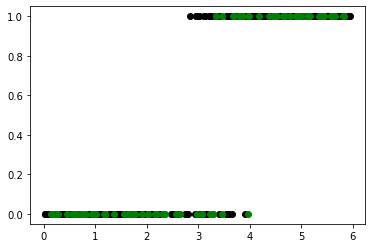

In [ ]:
#Plot, in different colors, the training and validation data sets

fig1 = plt.figure(num=1, clear=True)
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(xtrain3a,ytrain3a, 'ko')
ax1.plot(xvalid3a, yvalid3a, 'go')


#This seems to be a plot of whether or not someone passed based on a number 'x' ranging from 0 -- 6.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
def model_learn(k):
  model3a = LogisticRegression(solver = 'liblinear', random_state = 0, C=k)
  model3a.fit(xtrain3a,ytrain3a)
  model3a.classes_
  trainscore = model3a.score(xtrain3a, ytrain3a)
  validscore = model3a.score(xvalid3a, yvalid3a)
  print(f"C Value: {k}\nTraining Score: {trainscore}\nValidation Score: {validscore}\n")
  return trainscore, validscore

In [ ]:
model_Logistic_Regression_3a_v1 = LogisticRegression(solver = 'liblinear', random_state = 0)
model_Logistic_Regression_3a_v1.fit(xtrain3a, ytrain3a)
trainscore = model_Logistic_Regression_3a_v1.score(xtrain3a, ytrain3a)
validscore = model_Logistic_Regression_3a_v1.score(xvalid3a, yvalid3a)

print(f"Training Score: {trainscore}\nValidation Score: {validscore}")

Training Score: 0.9288888888888889
Validation Score: 0.8933333333333333


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
def model_KNN_3_a(number_of_neighbors):
  model_KNN_3_a = KNeighborsClassifier(n_neighbors=number_of_neighbors)
  model_KNN_3_a.fit(xtrain3a, ytrain3a)
  model_KNN_3_a_train_accuracy = accuracy_score(ytrain3a, model_KNN_3_a.predict(xtrain3a))
  model_KNN_3_a_valid_accuracy = accuracy_score(yvalid3a, model_KNN_3_a.predict(xvalid3a))
  print(f"k:{number_of_neighbors} Training Accuracy: {model_KNN_3_a_train_accuracy} Validation Accuracy: {model_KNN_3_a_valid_accuracy}")
  return model_KNN_3_a_train_accuracy, model_KNN_3_a_valid_accuracy

In [ ]:
model_KNN_3_a_accuracy_train = np.zeros(xvalid3a.size)
model_KNN_3_a_accuracy_valid = np.zeros(xvalid3a.size)

for k in range(1, xvalid3a.size + 1):
  model_KNN_3_a_accuracy_train[k-1], model_KNN_3_a_accuracy_valid[k-1] = model_KNN_3_a(k)

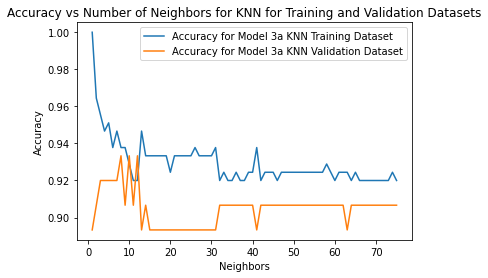

In [ ]:
neighbors_3_a = np.linspace(1, 75, 75)

fig3 = plt.figure(num=3, clear=True)
ax3 = fig3.add_subplot(1,1,1)
ax3.plot(neighbors_3_a, model_KNN_3_a_accuracy_train, label = "Accuracy for Model 3a KNN Training Dataset")
ax3.plot(neighbors_3_a, model_KNN_3_a_accuracy_valid, label = "Accuracy for Model 3a KNN Validation Dataset")
ax3.set_xlabel("Neighbors")
ax3.set_ylabel("Accuracy")
ax3.set_title("Accuracy vs Number of Neighbors for KNN for Training and Validation Datasets")
ax3.legend()


Let us choose k = 8 since it has the highest accuracy for the validation dataset, given the constraint accuracy of training dataset must be higher than validation dataset, in order to combat over-fitting.

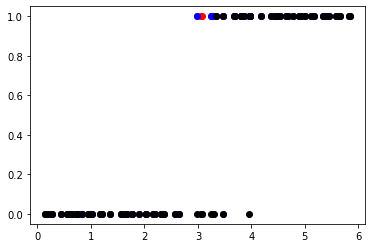

In [ ]:
yhat_LogisticRegression_3a = model_Logistic_Regression_3a_v1.predict(xvalid3a)
model_KNN_3_a_v2 = KNeighborsClassifier(n_neighbors = 8)
model_KNN_3_a_v2.fit(xtrain3a, ytrain3a)
yhat_KNN_3a = model_KNN_3_a_v2.predict(xvalid3a.reshape([-1,1]))

fig4 = plt.figure(num=4, clear=True)
ax4 = fig4.add_subplot(1,1,1)
ax4.plot(xvalid3a, yhat_LogisticRegression_3a, 'ro', label = "Logistic Regression Predictions")
ax4.plot(xvalid3a, yhat_KNN_3a, 'bo', label = "KNN Predictions with N=8")
ax4.plot(xvalid3a, yvalid3a, 'ko', label = "Actual Data")

**Problem 3(b)**: 2-d circles

In [ ]:
from sklearn.datasets import make_circles
x_3b,y_3b=make_circles(n_samples=700,shuffle=False,noise=.08,random_state=42)

In [ ]:
# # Save to csv if desired
# df=pd.DataFrame(data=np.concatenate((x,y.reshape(-1,1)),axis=1))
# df.columns=['x1','x2','y']
# df[:5]
# df.to_csv('3b.csv')

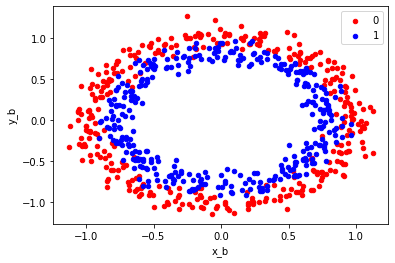

In [ ]:
#Plot, in different colors, the training and validation data sets
df = pd.DataFrame(dict(x_b=x_3b[:,0], y_b=x_3b[:,1], label = y_3b))
colors = {0: 'red', 1: 'blue'}
grouped = df.groupby('label')

fig5 = plt.figure(num =5, clear=True)
ax5 = fig5.add_subplot(1,1,1)
for key, group in grouped:
  group.plot(ax=ax5, kind='scatter', x='x_b', y='y_b', label = key, color = colors[key])

#This is a circle. Points in the outer circle are '0', and points in the inner circle are '1'

In [ ]:
xtrain3b, xvalid3b, ytrain3b, yvalid3b = train_test_split(x_3b,y_3b)

In [ ]:
model_Logistic_Regression_3b = LogisticRegression(solver = 'liblinear', random_state = 0)
model_Logistic_Regression_3b.fit(xtrain3b, ytrain3b)
trainscore3b = model_Logistic_Regression_3b.score(xtrain3b, ytrain3b)
validscore3b = model_Logistic_Regression_3b.score(xvalid3b, yvalid3b)

print(f"Training Score: {trainscore3b}\nValidation Score: {validscore3b}")

Training Score: 0.5028571428571429
Validation Score: 0.4742857142857143


In [ ]:
def model_KNN_3_b(number_of_neighbors):
  model_KNN_3_b = KNeighborsClassifier(n_neighbors=number_of_neighbors)
  model_KNN_3_b.fit(xtrain3b, ytrain3b)
  model_KNN_3_b_train_accuracy = accuracy_score(ytrain3b, model_KNN_3_b.predict(xtrain3b))
  model_KNN_3_b_valid_accuracy = accuracy_score(yvalid3b, model_KNN_3_b.predict(xvalid3b))
  print(f"k:{number_of_neighbors} Training Accuracy: {model_KNN_3_b_train_accuracy} Validation Accuracy: {model_KNN_3_b_valid_accuracy}")
  return model_KNN_3_b_train_accuracy, model_KNN_3_b_valid_accuracy

In [ ]:
model_KNN_3_b_accuracy_train = np.zeros(xvalid3b.size)
model_KNN_3_b_accuracy_valid = np.zeros(xvalid3b.size)

for k in range(1, xvalid3b.size + 1):
  model_KNN_3_b_accuracy_train[k-1], model_KNN_3_b_accuracy_valid[k-1] = model_KNN_3_b(k)

Text(0.5, 1.0, 'Accuracy vs Number of Neighbors for KNN for Training and Validation Datasets')

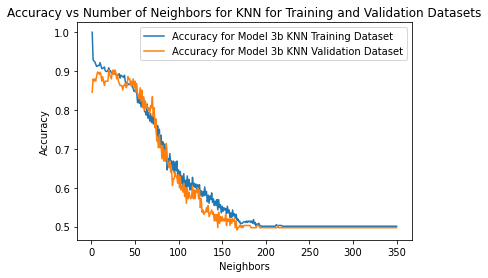

In [ ]:
neighbors_3_b = np.linspace(1, 350, 350)

fig6 = plt.figure(num=6, clear=True)
ax6 = fig6.add_subplot(1,1,1)
ax6.plot(neighbors_3_b, model_KNN_3_b_accuracy_train, label = "Accuracy for Model 3b KNN Training Dataset")
ax6.plot(neighbors_3_b, model_KNN_3_b_accuracy_valid, label = "Accuracy for Model 3b KNN Validation Dataset")
ax6.legend()
ax6.set_xlabel("Neighbors")
ax6.set_ylabel("Accuracy")
ax6.set_title("Accuracy vs Number of Neighbors for KNN for Training and Validation Datasets")

Let us choose k = 25 since it has the highest accuracy for the validation dataset, given the constraint accuracy of training dataset must be higher than validation dataset, in order to combat over-fitting. This has around a 89.71% accuracy for the validation dataset, and 92.19% accuracy for the training dataset.

Text(0.5, 1.0, 'KNN Prediction Dataset (N=10)')

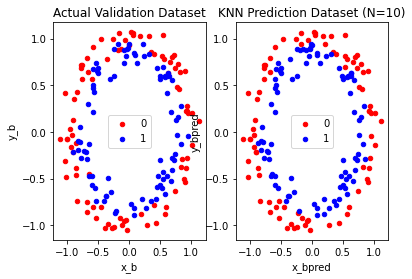

In [ ]:
model_KNN_3_b_v2 = KNeighborsClassifier(n_neighbors = 10)
model_KNN_3_b_v2.fit(xtrain3b, ytrain3b)
yhat_KNN_3b = model_KNN_3_b_v2.predict(xvalid3b.reshape([-1,2]))

df = pd.DataFrame(dict(x_b=xvalid3b[:,0], y_b=xvalid3b[:,1], label = yvalid3b))
dfpredict = pd.DataFrame(dict(x_bpred=xvalid3b[:,0], y_bpred=xvalid3b[:,1], label = yhat_KNN_3b))
colors = {0: 'red', 1: 'blue'}
grouped = df.groupby('label')
groupedpredict = dfpredict.groupby('label')

fig7 = plt.figure(num =77, clear=True)
ax7, ax8 = fig7.subplots(1,2)
for key, group in grouped:
  group.plot(ax=ax7, kind='scatter', x='x_b', y='y_b', label = key, color = colors[key])

for key, group in groupedpredict:
  group.plot(ax=ax8, kind='scatter', x='x_bpred', y='y_bpred', label = key, color = colors[key])

ax7.set_title("Actual Validation Dataset")
ax8.set_title("KNN Prediction Dataset (N=10)")

I prefer the K-Nearest Neighbors Classifier model due its' high accuracy. 

**Problem 3(c)**: 2-d moons

In [ ]:
from sklearn.datasets import make_moons
x_3c,y_3c=make_moons(n_samples=300,noise=.75,random_state=42)

In [ ]:
# # Save to csv if desired
# df=pd.DataFrame(data=np.concatenate((x,y.reshape(-1,1)),axis=1))
# df.columns=['x1','x2','y']
# df[:5]
# df.to_csv('3c.csv')

In [ ]:
xtrain3c, xvalid3c, ytrain3c, yvalid3c = train_test_split(x_3c,y_3c)

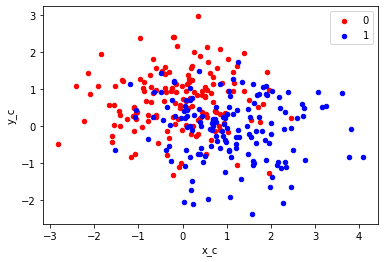

In [ ]:
#Plot, in different colors, the training and validation data sets
df3c = pd.DataFrame(dict(x_c=x_3c[:,0], y_c=x_3c[:,1], label = y_3c))
colors = {0: 'red', 1: 'blue'}
grouped = df3c.groupby('label')

fig8 = plt.figure(num =8, clear=True)
ax9 = fig8.add_subplot(1,1,1)
for key, group in grouped:
  group.plot(ax=ax9, kind='scatter', x='x_c', y='y_c', label = key, color = colors[key])

#This is a tough to distinguish. Although we know that this is supposed to be moons of different colors (0 vs 1), it is not clear from the picture below.

In [ ]:
model_Logistic_Regression_3c = LogisticRegression(solver = 'liblinear', random_state = 0)
model_Logistic_Regression_3c.fit(xtrain3c, ytrain3c)
trainscore3c = model_Logistic_Regression_3c.score(xtrain3c, ytrain3c)
validscore3c = model_Logistic_Regression_3c.score(xvalid3c, yvalid3c)

print(f"Training Score: {trainscore3c}\nValidation Score: {validscore3c}")

Training Score: 0.76
Validation Score: 0.7466666666666667


In [ ]:
def model_KNN_3_c(number_of_neighbors):
  model_KNN_3_c = KNeighborsClassifier(n_neighbors=number_of_neighbors)
  model_KNN_3_c.fit(xtrain3c, ytrain3c)
  model_KNN_3_c_train_accuracy = accuracy_score(ytrain3c, model_KNN_3_c.predict(xtrain3c))
  model_KNN_3_c_valid_accuracy = accuracy_score(yvalid3c, model_KNN_3_c.predict(xvalid3c))
  print(f"k:{number_of_neighbors} Training Accuracy: {model_KNN_3_c_train_accuracy} Validation Accuracy: {model_KNN_3_c_valid_accuracy}")
  return model_KNN_3_c_train_accuracy, model_KNN_3_c_valid_accuracy

In [ ]:
model_KNN_3_c_accuracy_train = np.zeros(xvalid3c.size)
model_KNN_3_c_accuracy_valid = np.zeros(xvalid3c.size)

for k in range(1, xvalid3c.size + 1):
  model_KNN_3_c_accuracy_train[k-1], model_KNN_3_c_accuracy_valid[k-1] = model_KNN_3_c(k)

Text(0.5, 1.0, 'Accuracy vs Number of Neighbors for KNN for Training and Validation Datasets')

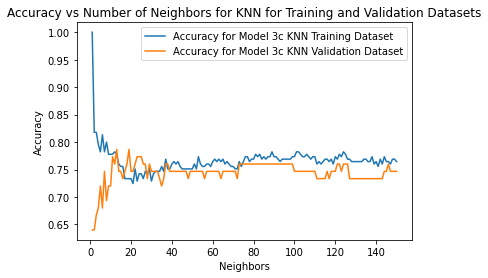

In [ ]:
neighbors_3_c = np.linspace(1, 150, 150)

fig9 = plt.figure(num=9, clear=True)
ax10 = fig9.add_subplot(1,1,1)
ax10.plot(neighbors_3_c, model_KNN_3_c_accuracy_train, label = "Accuracy for Model 3c KNN Training Dataset")
ax10.plot(neighbors_3_c, model_KNN_3_c_accuracy_valid, label = "Accuracy for Model 3c KNN Validation Dataset")
ax10.legend()
ax10.set_xlabel("Neighbors")
ax10.set_ylabel("Accuracy")
ax10.set_title("Accuracy vs Number of Neighbors for KNN for Training and Validation Datasets")

Let us choose k = 11 since it has the highest accuracy for the validation dataset, given the constraint accuracy of training dataset must be higher than validation dataset, in order to combat over-fitting. This has around a 77.33% accuracy for the validation dataset, and 77.77% accuracy for the training dataset.

Text(0.5, 1.0, 'KNN Prediction Dataset (N=3)')

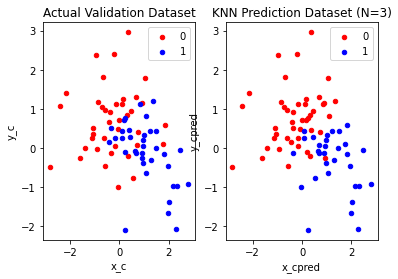

In [ ]:
model_KNN_3_c_v2 = KNeighborsClassifier(n_neighbors = 11)
model_KNN_3_c_v2.fit(xtrain3c, ytrain3c)
yhat_KNN_3c = model_KNN_3_c_v2.predict(xvalid3c.reshape([-1,2]))

df = pd.DataFrame(dict(x_c=xvalid3c[:,0], y_c=xvalid3c[:,1], label = yvalid3c))
dfpredict3c = pd.DataFrame(dict(x_cpred=xvalid3c[:,0], y_cpred=xvalid3c[:,1], label = yhat_KNN_3c))
colors = {0: 'red', 1: 'blue'}
grouped = df.groupby('label')
groupedpredict3c = dfpredict3c.groupby('label')

fig10 = plt.figure(num =10, clear=True)
ax11, ax12 = fig10.subplots(1,2)
for key, group in grouped:
  group.plot(ax=ax11, kind='scatter', x='x_c', y='y_c', label = key, color = colors[key])

for key, group in groupedpredict3c:
  group.plot(ax=ax12, kind='scatter', x='x_cpred', y='y_cpred', label = key, color = colors[key])

ax11.set_title("Actual Validation Dataset")
ax12.set_title("KNN Prediction Dataset (N=3)")

I prefer the K-Nearest Neighbors model due to its relatively high accuracy and the fact that we can check for over-fitting. In the logistic regression model, if we have over fitted as evidenced by the higher accuracy for the validation / hidden dataset than the training dataset, we couldn't do much to solve it (based on what methods and parameters have been covered).

**Problem 3(d)**: Breast Cancer Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
x,y=load_breast_cancer(return_X_y=True)

In [ ]:
# # Save to csv if desired
df3d=pd.DataFrame(data=np.concatenate((x,y.reshape(-1,1)),axis=1))
df3d[:5]
df.to_csv('3d.csv')

In [ ]:
xtrain3d, xvalid3d, ytrain3d, yvalid3d = train_test_split(x, y)
print(xvalid3d.shape)

(143, 30)


In [ ]:
model_Logistic_Regression_3d = LogisticRegression(solver = 'liblinear', random_state=0)
model_Logistic_Regression_3d.fit(xtrain3d, ytrain3d)
trainscore3d = model_Logistic_Regression_3d.score(xtrain3d, ytrain3d)
validscore3d = model_Logistic_Regression_3d.score(xvalid3d, yvalid3d)

print(f"Training Score: {trainscore3d}\nValidation Score: {validscore3d}")

Training Score: 0.9694835680751174
Validation Score: 0.951048951048951


In [ ]:
def model_KNN_3_d(number_of_neighbors):
  model_KNN_3_d = KNeighborsClassifier(n_neighbors=number_of_neighbors)
  model_KNN_3_d.fit(xtrain3d, ytrain3d)
  model_KNN_3_d_train_accuracy = accuracy_score(ytrain3d, model_KNN_3_d.predict(xtrain3d))
  model_KNN_3_d_valid_accuracy = accuracy_score(yvalid3d, model_KNN_3_d.predict(xvalid3d))
  print(f"k:{number_of_neighbors} Training Accuracy: {model_KNN_3_d_train_accuracy} Validation Accuracy: {model_KNN_3_d_valid_accuracy}")
  return model_KNN_3_d_train_accuracy, model_KNN_3_d_valid_accuracy

In [ ]:
model_KNN_3_d_accuracy_train = np.zeros(143)
model_KNN_3_d_accuracy_valid = np.zeros(143)

for k in range(1, 143 + 1):
  model_KNN_3_d_accuracy_train[k-1], model_KNN_3_d_accuracy_valid[k-1] = model_KNN_3_d(k)

Text(0.5, 1.0, 'Accuracy vs Number of Neighbors for KNN for Training and Validation Datasets')

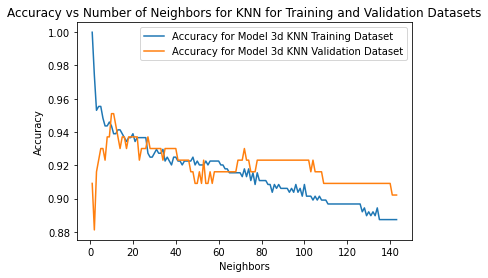

In [ ]:
neighbors_3_d = np.linspace(1, 143, 143)

fig11 = plt.figure(num=11, clear=True)
ax13 = fig11.add_subplot(1,1,1)
ax13.plot(neighbors_3_d, model_KNN_3_d_accuracy_train, label = "Accuracy for Model 3d KNN Training Dataset")
ax13.plot(neighbors_3_d, model_KNN_3_d_accuracy_valid, label = "Accuracy for Model 3d KNN Validation Dataset")
ax13.legend()
ax13.set_xlabel("Neighbors")
ax13.set_ylabel("Accuracy")
ax13.set_title("Accuracy vs Number of Neighbors for KNN for Training and Validation Datasets")

I would prefer the Logistic Regression Model due to its higher accuracy (Validation - 95.8% and Training - 95.3%, compared to Validation - 93.0% and Training - 96.0% for KNN, k=3). However, I would be wary of overfitting, as the validation accuracy for the logistic regression model is higher than the training accuracy. Additionally, we would want to check a matrix of True and False Negatives and True and False Positives, as we would like a higher detection rate of True Positives, despite this possibly increasing the number of False Positives and affecting the overall accuracy, as well as a decreased number of False Negatives, given that we are screening for the presence of cancer.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
yhat_LogisticRegression_3d = model_Logistic_Regression_3d.predict(xvalid3d)
confusion_matrix(yvalid3d, yhat_LogisticRegression_3d)

array([[54,  3],
       [ 4, 82]])

In [ ]:
model_KNN_3_d_v2 = KNeighborsClassifier(n_neighbors=3)
model_KNN_3_d_v2.fit(xtrain3d, ytrain3d)
yhat_KNN_3d = model_KNN_3_d_v2.predict(xvalid3d)

confusion_matrix(yvalid3d, yhat_KNN_3d)

array([[49,  8],
       [ 4, 82]])

Comparing the two confusion matrices, KNN with n=3 though less accurate has a higher True Positive count and a lower False Negative count. We would gladly prefer this over the 3-4% accuracy given by the Logistic Regression model.

**Problem 4(a)**: Checking Validation Splits

In [ ]:
x_4a,y_4a=make_moons(n_samples=300,noise=.75,random_state=42)
x_4b,y_4b=make_moons(n_samples=300,noise=.75,random_state=24)
x_4c,y_4c=make_moons(n_samples=300,noise=.75,random_state=5)
x_4d,y_4d=make_moons(n_samples=300,noise=.75,random_state=83)
x_4e,y_4e=make_moons(n_samples=300,noise=.75,random_state=63)

In [ ]:
x_train4a, x_valid4a, y_train4a, y_valid4a = train_test_split(x_4a, y_4a)
x_train4b, x_valid4b, y_train4b, y_valid4b = train_test_split(x_4b, y_4b)
x_train4c, x_valid4c, y_train4c, y_valid4c = train_test_split(x_4c, y_4c)
x_train4d, x_valid4d, y_train4d, y_valid4d = train_test_split(x_4d, y_4d)
x_train4e, x_valid4e, y_train4e, y_valid4e = train_test_split(x_4e, y_4e)

In [ ]:
def model_KNN_4(number_of_neighbors, xtrain, ytrain, xvalid, yvalid):
  model_KNN_4 = KNeighborsClassifier(n_neighbors=number_of_neighbors)
  model_KNN_4.fit(xtrain, ytrain)
  model_KNN_4_train_accuracy = accuracy_score(ytrain, model_KNN_4.predict(xtrain))
  model_KNN_4_valid_accuracy = accuracy_score(yvalid, model_KNN_4.predict(xvalid))
  print(f"k:{number_of_neighbors} Training Accuracy: {model_KNN_4_train_accuracy} Validation Accuracy: {model_KNN_4_valid_accuracy}")
  return model_KNN_4_train_accuracy, model_KNN_4_valid_accuracy

In [ ]:
model_KNN_4_a_accuracy_train = np.zeros(x_valid4a.size)
model_KNN_4_a_accuracy_valid = np.zeros(x_valid4a.size)

for k in range(1, x_valid4a.size + 1):
  model_KNN_4_a_accuracy_train[k-1], model_KNN_4_a_accuracy_valid[k-1] = model_KNN_4(k, x_train4a, y_train4a, x_valid4a, y_valid4a)

In [ ]:
model_KNN_4_b_accuracy_train = np.zeros(x_valid4b.size)
model_KNN_4_b_accuracy_valid = np.zeros(x_valid4b.size)

for k in range(1, x_valid4b.size + 1):
  model_KNN_4_b_accuracy_train[k-1], model_KNN_4_b_accuracy_valid[k-1] = model_KNN_4(k, x_train4b, y_train4b, x_valid4b, y_valid4b)

In [ ]:
model_KNN_4_c_accuracy_train = np.zeros(x_valid4c.size)
model_KNN_4_c_accuracy_valid = np.zeros(x_valid4c.size)

for k in range(1, x_valid4c.size + 1):
  model_KNN_4_c_accuracy_train[k-1], model_KNN_4_c_accuracy_valid[k-1] = model_KNN_4(k, x_train4c, y_train4c, x_valid4c, y_valid4c)

In [ ]:
model_KNN_4_d_accuracy_train = np.zeros(x_valid4d.size)
model_KNN_4_d_accuracy_valid = np.zeros(x_valid4d.size)

for k in range(1, x_valid4d.size + 1):
  model_KNN_4_d_accuracy_train[k-1], model_KNN_4_d_accuracy_valid[k-1] = model_KNN_4(k, x_train4d, y_train4d, x_valid4d, y_valid4d)

In [ ]:
model_KNN_4_e_accuracy_train = np.zeros(x_valid4e.size)
model_KNN_4_e_accuracy_valid = np.zeros(x_valid4e.size)

for k in range(1, x_valid4e.size + 1):
  model_KNN_4_e_accuracy_train[k-1], model_KNN_4_e_accuracy_valid[k-1] = model_KNN_4(k, x_train4e, y_train4e, x_valid4e, y_valid4e)

Text(0.5, 1.0, 'Accuracy vs Number of Neighbors for KNN for Training and Validation Datasets (SET A)')

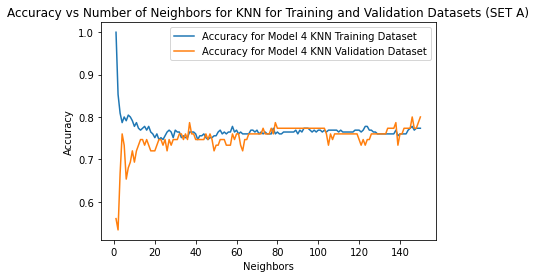

In [ ]:
neighbors_4 = np.linspace(1, 150, 150)

fig12 = plt.figure(num=12, clear=True)
ax14 = fig12.add_subplot(1,1,1)
ax14.plot(neighbors_4, model_KNN_4_a_accuracy_train, label = "Accuracy for Model 4 KNN Training Dataset")
ax14.plot(neighbors_4, model_KNN_4_a_accuracy_valid, label = "Accuracy for Model 4 KNN Validation Dataset")
ax14.legend()
ax14.set_xlabel("Neighbors")
ax14.set_ylabel("Accuracy")
ax14.set_title("Accuracy vs Number of Neighbors for KNN for Training and Validation Datasets (SET A)")

Text(0.5, 1.0, 'Accuracy vs Number of Neighbors for KNN for Training and Validation Datasets (SET B)')

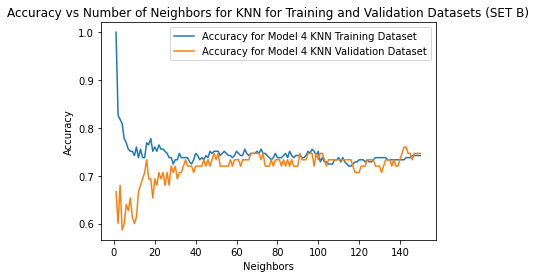

In [ ]:
fig13 = plt.figure(num=13, clear=True)
ax15 = fig13.add_subplot(1,1,1)
ax15.plot(neighbors_4, model_KNN_4_b_accuracy_train, label = "Accuracy for Model 4 KNN Training Dataset")
ax15.plot(neighbors_4, model_KNN_4_b_accuracy_valid, label = "Accuracy for Model 4 KNN Validation Dataset")
ax15.legend()
ax15.set_xlabel("Neighbors")
ax15.set_ylabel("Accuracy")
ax15.set_title("Accuracy vs Number of Neighbors for KNN for Training and Validation Datasets (SET B)")

Text(0.5, 1.0, 'Accuracy vs Number of Neighbors for KNN for Training and Validation Datasets (SET C)')

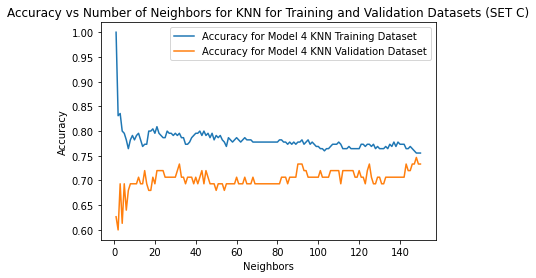

In [ ]:
fig14 = plt.figure(num=14, clear=True)
ax16 = fig14.add_subplot(1,1,1)
ax16.plot(neighbors_4, model_KNN_4_c_accuracy_train, label = "Accuracy for Model 4 KNN Training Dataset")
ax16.plot(neighbors_4, model_KNN_4_c_accuracy_valid, label = "Accuracy for Model 4 KNN Validation Dataset")
ax16.legend()
ax16.set_xlabel("Neighbors")
ax16.set_ylabel("Accuracy")
ax16.set_title("Accuracy vs Number of Neighbors for KNN for Training and Validation Datasets (SET C)")

Text(0.5, 1.0, 'Accuracy vs Number of Neighbors for KNN for Training and Validation Datasets (SET D)')

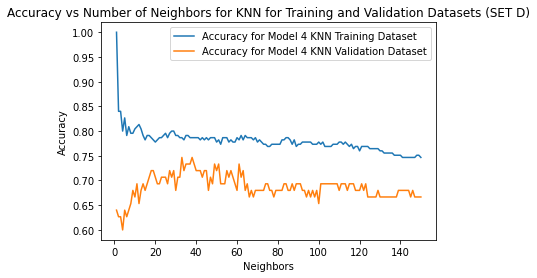

In [ ]:
fig15 = plt.figure(num=15, clear=True)
ax17 = fig15.add_subplot(1,1,1)
ax17.plot(neighbors_4, model_KNN_4_d_accuracy_train, label = "Accuracy for Model 4 KNN Training Dataset")
ax17.plot(neighbors_4, model_KNN_4_d_accuracy_valid, label = "Accuracy for Model 4 KNN Validation Dataset")
ax17.legend()
ax17.set_xlabel("Neighbors")
ax17.set_ylabel("Accuracy")
ax17.set_title("Accuracy vs Number of Neighbors for KNN for Training and Validation Datasets (SET D)")

Text(0.5, 1.0, 'Accuracy vs Number of Neighbors for KNN for Training and Validation Datasets (SET E)')

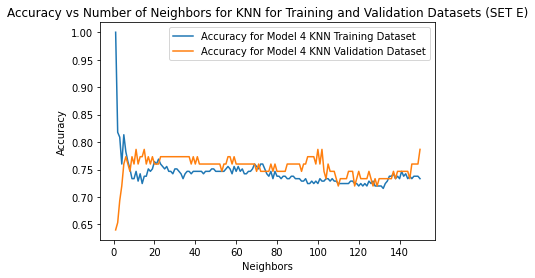

In [ ]:
fig16 = plt.figure(num=16, clear=True)
ax18 = fig16.add_subplot(1,1,1)
ax18.plot(neighbors_4, model_KNN_4_e_accuracy_train, label = "Accuracy for Model 4 KNN Training Dataset")
ax18.plot(neighbors_4, model_KNN_4_e_accuracy_valid, label = "Accuracy for Model 4 KNN Validation Dataset")
ax18.legend()
ax18.set_xlabel("Neighbors")
ax18.set_ylabel("Accuracy")
ax18.set_title("Accuracy vs Number of Neighbors for KNN for Training and Validation Datasets (SET E)")

For Set A, KNN with k = 32 gives the best accuracy pair of 76.44% for Training Dataset and 76% for Validation Dataset.

For Set B, KNN with k = 51 gives the best accuracy pair of 75.11% for Training Dataset and 74.67% for Validation Dataset.

For Set C, KNN with k = 148 gives the best accuracy pair of 75.55% for Training Dataset and 74.67% for Validation Dataset.

For Set D, KNN with k = 33 gives the best accuracy pair of 78.67% for Training Dataset and 74.67% for Validation Dataset.

For Set E, KNN with k = 6 gives the best accuracy pair of 78.22% for Training Dataset and 77.33% for Validation Dataset.

Lastly, for the dataset in Part 3c, k = 11 gives the best accuracy pair of 77.77% for Training Dataset and 77.33% for Validation Dataset.

**Problem 4(b)**: Checking Validation Splits

I expected the varying optimal k-values with the differing splits because the training and validation split of the data using the test_train_split method in the sklearn library splits the data into different sets due to the different values for the random_state argument.

**Problem 5**

I spent approximately 15-20 hours on this homework. I have adhered to the Duke Community Standard.